In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
data_path = "../sum_data-0.csv"
data = pd.read_csv(data_path)
# Show the first 5 rows of the dataframe.
data.head()

,data,label
0,job posting - apple-iss research center conten...,0.0
1,"lang classification grimes , joseph e . and b...",0.0
2,query : letter frequencies for text identifica...,0.0
3,risk a colleague and i are researching the dif...,0.0
4,request book information earlier this morning ...,0.0


In [7]:
# Dropping rows with missing values
data.dropna(inplace=True)

# Extracting features and labels
X = data['data']
y = data['label']

In [56]:
# Converting text data into numerical features using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')

X_tfidf = tfidf.fit_transform(X)
# print(X_tfidf)

In [9]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [67]:
# Training the SVM model
svm_model = SVC(kernel='linear')
history = svm_model.fit(X_train, y_train)

print(history)

SVC(kernel='linear')


In [65]:
# Making predictions
y_pred = svm_model.predict(X_test)

# print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.

In [14]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9943181818181818
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       495
         1.0       1.00      0.98      0.99       209

    accuracy                           0.99       704
   macro avg       1.00      0.99      0.99       704
weighted avg       0.99      0.99      0.99       704



In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

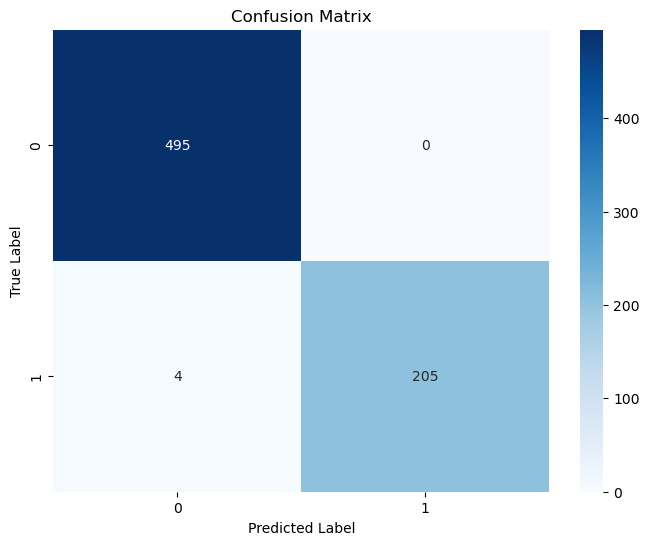

In [18]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [19]:
# Exporting the model and the TF-IDF vectorizer
model_path = './svm_model.joblib'
vectorizer_path = './tfidf_vectorizer.joblib'

joblib.dump(svm_model, model_path)
joblib.dump(tfidf, vectorizer_path)

['./tfidf_vectorizer.joblib']

In [20]:
# Load the model and vectorizer
svm_model = joblib.load("./svm_model.joblib")
tfidf_vectorizer = joblib.load("./tfidf_vectorizer.joblib")

In [27]:
def predict_spam(message):
    message_tfidf = tfidf_vectorizer.transform([message])
    prediction = svm_model.predict(message_tfidf)
    print(prediction)
    return "Spam" if prediction[0] == 1.0 else "Not Spam"

In [30]:
# Test with a new message
# Example texts
text_not_spam = "Hey! How are you doing. Let's catch up soon!555"
text_spam = "Congratulations! You've been selected as a winner. Text WON to 44255 to claim your prize. "

result = predict_spam(text_not_spam)
print(f"The message is: {result}")


[0.]
The message is: Not Spam


In [31]:
result = predict_spam(text_spam)
print(f"The message is: {result}")

[1.]
The message is: Spam
